# Quora Question Pairs (Complete Case Study)
Eng: **Asem Saafan** - https://www.linkedin.com/in/asemsafan/

## Introduction 
**Quora** is a place to gain and share knowledge. It's a platform to ask questions and connect with people who contribute unique insights and quality answers. </br>
At the time this competition first presented in Kaggle (5 years ago) the site was getting more than 100 million visitors every single month, now this number increased to 300 million visitors per month, anyone can ask question about the topic he or she want and get answers and Insights from others.


## The Problem from Business Point of View
Because the fact that those huge number of visitors can ask similar questions (which have slightly different words with the same meaning as example), Quora try to identify similar questions (very similar ones which we can say that they are duplicates).<br>
After identifying them they can provide answers to newly asked questions instantly depending on its high similarity to a question already answered on Quora.<br>
This process can improve a lot the User Experience (UX) in the application web or mobile because of three important ideas:<br>
- it will provide answers instantly for the questioner.<br>
- it also provides the best ones which may be upvoted by more people in the old question.<br>
- it helps the user who want to search about a question to quickly find the right answer instead of being overwhelmed by a lot of questions.


## Real World Business Constraints
1.	**No latency concerns** as it is not required to do this process in milliseconds, it may take few seconds or minutes to get the best answer depending on accurate similarity prediction. 
2.	**The cost of mis-classification can be very high**, if someone asks a question and the system recommends answers based on similar question but in fact, they seem similar but they are not so you suggest wrong answers which will affect user experience badly.
3.	You must **define a threshold** for the probability above which you can say they are duplicate.
4.	**Interpretability is partially important** to know what’s your classification depends on?


## Data 
-	CSV file for training data: **train.csv**.
-	Size of the file: 60.4 MB.
-   Every record contains 2 questions IDs and the actual text body for every question and finally the probability of being duplicate. 
-	More info about number of rows, features and sample will be explored below.

## The Problem from Machine Learning Point of View
We can say that it’s a binary classification problem as we need to predict if they are duplicate or not. </br>
Simply we need to solve this function f(q1,q2) = {0,1}
Evaluation Metrics: 
-	**Log-Loss metric** as Quora said in the Kaggle page and its obvious as it’s a probability not only looking for the final output prediction (Similar or not).
-	**Binary Confusion Matrix** to look for the cost of misclassification as we go on and also the interpretability.


## Exploratory Data Analysis 
Now let’s more about our data.

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# remove warning
import warnings
warnings.filterwarnings('ignore')

#### Reading data and basic stats

In [2]:
# importing the data (one csv file)
df = pd.read_csv ("train.csv")
# printing the shape to knwo how many columns (features) and rows (records)
df.shape

(404290, 6)

In [3]:
# take a look at the head to see data sample 
df.head ()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
# more info about the fields to make a proper description of the data
# using info() function not describe() because it don't have numerical fields
# and also to find the number of non-null fields
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


#### Our data consists of 404290 rows and 6 columns. </br>
##### The 6 basic columns: 
- id: unique id for the record or the row.
- qid1 and qid2: unique identifier for each question we have in the record.
- question1 and question2: the actual text content of the two questions.
- Is_duplicate: this will be the label we are trying to learn from and predict in the final model which will say if the two question is very similar to be duplicates or not. 
</br></br>
##### We have only 3 null fields in the data which exists as 3 missing questions.
*	This percentage which is 3/404290 is very awesome so we can remove or we can just keep them as an empty string ' '.


#### Distributions of the Data

In [5]:
df['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [6]:
number_of_non_similar = df['is_duplicate'].value_counts()[0]
number_of_similar = df['is_duplicate'].value_counts()[1]

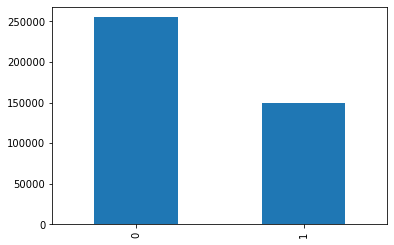

In [7]:
df['is_duplicate'].value_counts().plot(kind='bar')

In [8]:
print(f'Total Number of Question Pairs is {len(df)}')

Total Number of Question Pairs is 404290


In [9]:
print(f'Total Number of Similar Pairs is {number_of_similar}, about {number_of_similar/len(df)*100:1.2f}%')
print(f'Total Number of Non-Similar Pairs is {number_of_non_similar}, about {number_of_non_similar/len(df)*100:1.2f}%')

Total Number of Similar Pairs is 149263, about 36.92%
Total Number of Non-Similar Pairs is 255027, about 63.08%


#### Number of Unique Questions

In [10]:
# combine all ids into one Series to dicover more about it 
all_ids = pd.Series (df['qid1'].tolist() + df['qid2'].tolist())
# get the unique IDs of questions
unique_ids = len(all_ids.unique())
# print the total number of unique questions 
print (f'Total number of  Unique Questions are: {unique_ids}\n')
# we now knew that we have many question that are repeated, lets count them
number_of_repeated_ids = np.sum (all_ids.value_counts() > 1)
# print number of repeated questions 
print (f'Number of unique questions that appear more than one time: {number_of_repeated_ids} about({number_of_repeated_ids/unique_ids*100:1.2f}%)\n')
print (f'Top 5 question IDs repeated:\n{all_ids.value_counts().nlargest(5)}\n') 


Total number of  Unique Questions are: 537933

Number of unique questions that appear more than one time: 111780 about(20.78%)

Top 5 question IDs repeated:
2559     157
30782    120
4044     111
2561      88
14376     79
dtype: int64



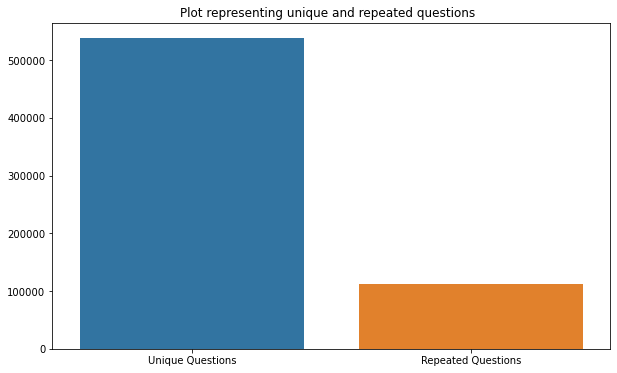

In [11]:
x = ["Unique Questions" , "Repeated Questions"]
y =  [unique_ids , number_of_repeated_ids]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

#### Checking for Duplicates

In [12]:
#checking whether there are any repeated pair of questions
pair_duplicates = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count()
difference_between_both = df.shape[0] - pair_duplicates.shape[0]

print(f"Number of duplicate questions: {difference_between_both}")

Number of duplicate questions: 0


#### Number of occurrences of each question 
Check the frequency of each word and take into consideration that y-axis has a **logarithmic scale** so there's more than 300k questions appeared one time only and 60k question appeared two times, you may feel that they are close this because of the scale.

Maximum number of times a single question is repeated: 157



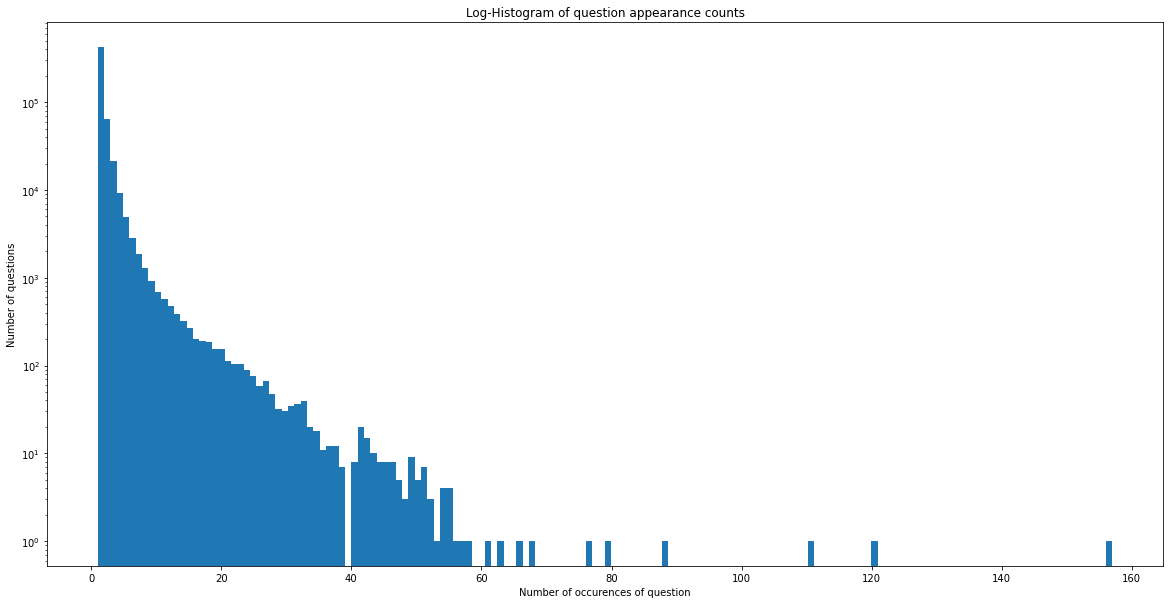

In [13]:
plt.figure(figsize=(20, 10))

plt.hist(all_ids.value_counts(), bins=160)

plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(all_ids.value_counts()))) 

#### Checking and dealing with Null Values

In [14]:
non_rows = df[df.isnull().any(1)]
non_rows

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


Convert this **NaN** values with an empty string **' '**.

In [15]:
df = df.fillna(' ')
non_rows = df[df.isnull().any(1)]
non_rows

,id,qid1,qid2,question1,question2,is_duplicate


#### Top Frequent words in both classes

In [16]:
# import necessary Functions
from wordcloud import WordCloud, STOPWORDS

In [17]:
duplicated_questions_df = df[df['is_duplicate'] == 1]
non_duplicated_questions_df= df[df['is_duplicate'] == 0]

In [18]:
# Converting both columns for questions to arrays and combine and flatten them using np.dstack
# like {{1,2},{3,4}} to {1,2,3,4}
duplicated_question_text = np.dstack([duplicated_questions_df["question1"], duplicated_questions_df["question2"]]).flatten()
non_duplicated_question_text = np.dstack([non_duplicated_questions_df["question1"], non_duplicated_questions_df["question2"]]).flatten()

# using stopwords from wordcloud
# You can add or remove stop words to this list by stop_words.add(" ") and stop_words.remove(" ")
stop_words = set(STOPWORDS)

Let's create a function to generate and Plot WordCloud for Each Text

In [19]:
def generate_word_cloud(text,stopwords,title):
    """
    Function to Generate Word Cloud for String 
    To Use it just call it and pass (text_to_generate_wordcloud_for, stop_words ,Text for title)
    """
    wc = WordCloud(background_color="white", max_words=len(text), stopwords=stopwords)
    wc.generate(np.array2string(text))
    print (f"Word Cloud for {title}")
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

Word Cloud for Duplicated Questions


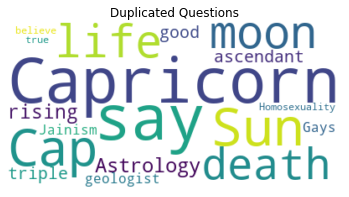

In [20]:
# Let's Generate WordCloud for Duplicated Questions
generate_word_cloud(duplicated_question_text,stop_words,"Duplicated Questions")

Word Cloud for Non-Duplicated Questions


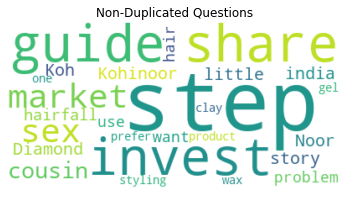

In [21]:
generate_word_cloud(non_duplicated_question_text,stop_words,"Non-Duplicated Questions")

## Feature Extraction
In this case study we will try practice most of NLP feature extraction methods and if you are solving case study on **Kaggle**, read the discussion and you will find awesome instructions. <br>
We will go through **3 Steps**:
* Basic Feature Extraction (before cleaning)
* Advanced Feature Ex (after cleaning - preprocessing stage)
* Featurizing our text with TFIDF and Word2Vector

* we will work on a **sample from the data** for faster processing and memory constraints
* our sample will be **40,000 row**

In [22]:
df_sample = df.sample(40000,random_state=42)

In [23]:
print(df_sample.shape)
df_sample.head()

(40000, 6)


,id,qid1,qid2,question1,question2,is_duplicate
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1


### Basic Feature Extraction

In our basic featrure extraction part we will focus on very basic properties of the questions and before defining any variable we will define it with easy English definition in a comment.

In [24]:
# Functions we will use in get_basic_features function

# Get common words between two questions
def get_common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * len(w1 & w2)

# Get Total words between two questions
def get_total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * (len(w1) + len(w2))

# Get common words share by deviding the above two methods
def get_common_words_share(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))

Let's Create a function to create all basic features we will create in our data frame like:
* **Frequency of both questions** using their IDs. (2 features)
* **Length of both questions**.(2 features)
* **Number of words** in both questions. (2 features)
* **Common words** between two questions. (1 feature)
* **Total words** in both questions. (1 feature)
* **Common words share** in both questions. (1 feature)
* **Sum of both question frequnces**. (1 feature)
* **Absolute diffrence between both question frequnces**. (1 feature)

In [25]:
def get_basic_features (df):
    """
    Function Used to get all basic features from both questions in our DataFrame
    like frequency, length, Number of words, Number of common words words
    and total number of words in both questions.
    
    To use it just call it and pass your DataFrame as an Argument.
    """
    print ('Creating basic features...')
    # Get the frequency of question 1 from its ID
    df['q1_id_frequency'] = df.groupby('qid1')['qid1'].transform('count')
    # Get the frequency of question 2 from its ID
    df['q2_id_frequency'] = df.groupby('qid2')['qid2'].transform('count')
    
    # Get the length of Question 1
    df['q1_length'] = df['question1'].str.len()
    # Get the length of Question 2
    df['q2_length'] = df['question2'].str.len()
    
    # Get the number of words in question 1
    df['q1_number_of_words'] = df['question1'].str.split().apply(len)
    # Get the number of words in question 2
    df['q2_number_of_words'] = df['question2'].str.split().apply(len)
    
    # Get common words between two questions
    df['common_words'] = df.apply(get_common_words, axis=1)
    # Get total words between two questions
    df['total_words'] = df.apply(get_total_words, axis=1)
    # Get common words share between two questions
    df['common_words_share'] = df.apply(get_common_words_share, axis=1)

    # Get the summation of both question frequences
    df['freq_q1+q2'] = df['q1_id_frequency']+df['q2_id_frequency']
    # Get the absolute difference between both question frequences
    df['freq_q1-q2'] = abs(df['q1_id_frequency']-df['q2_id_frequency'])
    
    print ('Basic Features is created in your Data Frame \n')
    print (df.head(2))
    
    # Save your DF with basic features as df_basic_features.csv
    df.to_csv('df_basic_features.csv', index=False)
    return df

In [26]:
# df_with_basic = get_basic_features(df_sample)

In [27]:
# df_with_basic.columns

We have now **exported the dataframe with basic features** if we need to start running from this point just run the next command

In [28]:
df_sample_basic = pd.read_csv('df_basic_features.csv')
df_sample_basic.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_id_frequency,q2_id_frequency,q1_length,q2_length,q1_number_of_words,q2_number_of_words,common_words,total_words,common_words_share,freq_q1+q2,freq_q1-q2
0,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,1,1,34,34,8,8,7.0,16.0,0.437500,2,0
1,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,1,1,53,51,11,9,6.0,20.0,0.300000,2,0
2,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,1,1,96,45,16,8,2.0,24.0,0.083333,2,0
3,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,2,2,44,52,7,9,4.0,16.0,0.250000,4,0
4,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,1,4,38,29,9,7,3.0,16.0,0.187500,5,3


### Preprocessing of Text
Our preprocessing Stage contains of:
* Removing HTML tags if found
* Removing punctuations
* Performing Stemming
* Removing stop words
* Expanding contractions

In [29]:
# import needed libraries for preprocessing 

from nltk.stem import PorterStemmer # to return every word to its original state
from bs4 import BeautifulSoup # to remove HTML tags if found
import re # to compile, substitute, match and find Strings based on notation if needed

In [30]:
def preprocess(text):
    """
    A function to do our preprocess step from removing stop words and perform stemming, etc...
    """
    
    if len(text) == 0:
        return text
        
    # Lower case your text
    text = str(text).lower()
    
    # Create a dictionary for words to replace
    words_to_replace = {
        ",000,000": "m",
        ",000": "k",
        "′": "'",
        "’": "'",
        "won't": "will not",
        "cannot": "can not",
        "can't": "can not",
        "n't": " not",
        "what's": "what is",
        "it's": "it is",
        "'ve": " have",
        "i'm": "i am",
        "'re": " are",
        "he's": "he is",
        "she's": "she is",
        "'s": " own",
        "%": " percent ",
        "₹": " rupee ",
        "$": " dollar ",
        "€": " euro ",
        "'ll": " will"
    }
    
    # Replace old words with consistent format
    for old, new in words_to_replace.items():
        text = text.replace(old, new)
    
    # Initializing Porter Stemmer
    porter = PorterStemmer()
    # a pattern to search for alpahnumeric values only
    pattern = re.compile('\W')
    # 
    if isinstance(text, str):
        # removing alphanumeric values - substitute with empty space
        text = re.sub(pattern,' ',text)
        # use the porter to stem our text
        text = porter.stem(text)
        # Initializing BeatifulSoup with our Text
        beatiful_soup = BeautifulSoup(text)
        # Get our text from beatiful soup and remove tags if found
        text = beatiful_soup.get_text()
    
    # Finally return our text after preprocessing finished
    return text

Our **Preprocessing function** is ready to use when needed.

### Advanced Feature Extraction

In this stage we will **extract advanced features** like:
* Ratio of common word count to min and max lenghth of word count of Q1 and Q2. (**2** features)
* Ratio of common stop word count to min and max lenghth of stop count of Q1 and Q2. (**2** features)
* Ratio of common token count to min and max lenghth of word count of Q1 and Q2. (**2** features)
* Check if First and last words of both questions is equal or not. (**2** features)
* Absolute token difference and Average length of both Questions. (**2** features)
* fuzz_ratio, fuzz_partial_ratio, token_sort_ratio, token_set_ratio. (**4** amazing features)


Let's start by creating main and helper methods to use while getting our advanced features:

In [31]:
# getting stopwords from nltk this time to use it and remove stop words from tokens
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [32]:
# defining helper method to take 2 questions and return list of features
def generate_advanced_features_from_tokens (question1, question2):
    """
    Function to Generate top 10 advanced features in the above list like:
    * Ratio of common word count to min and max lenghth of word count of Q1 and Q2. (**2** features)
    * Ratio of common stop word count to min and max lenghth of stop count of Q1 and Q2. (**2** features)
    * Ratio of common token count to min and max lenghth of word count of Q1 and Q2. (**2** features)
    * Check if First and last words of both questions is equal or not. (**2** features)
    * Absolute token difference and Average length of both Questions. (**2** features)
    """
    # Initialize a list to save advanced features
    # Initialized with zeros to return if string is empty
    advanced_features_list = [0.0]*10 
    
    # convert question string into tokens by just splitting them
    question1_tokens = question1.split()
    question2_tokens = question2.split()
    
    # check if the questions ins empty or not
    if len(question1) == 0 or len(question2) == 0:
        return advanced_features_list
    
    save_division = .001 # to prevent zero devision
    
    # Get the words (tokens - stopwords) in Questions
    question1_words = set([word for word in question1_tokens if word not in stop_words])
    question2_words = set([word for word in question2_tokens if word not in stop_words])
    
    #Get the stop words from tokens
    question1_stop_words = set([word for word in question1_tokens if word in stop_words])
    question2_stop_words = set([word for word in question2_tokens if word in stop_words])
    
    # Get the number of common Tokens from Question pair
    common_token_count = len(set(question1_tokens).intersection(set(question2_tokens)))
    # Get the number of common words from Question pair
    common_word_count = len(question1_words.intersection(question2_words))
    # Get the number of common stopwords from Question pair
    common_stop_count = len(question1_stop_words.intersection(question2_stop_words))
    
    # Getting the first 6 features (Ratios)
    advanced_features_list[0] = common_word_count / (min(len(question1_words), len(question2_words)) + save_division)
    advanced_features_list[1] = common_word_count / (max(len(question1_words), len(question2_words)) + save_division)
    advanced_features_list[2] = common_stop_count / (min(len(question1_stop_words), len(question2_stop_words)) + save_division)
    advanced_features_list[3] = common_stop_count / (max(len(question1_stop_words), len(question2_stop_words)) + save_division)
    advanced_features_list[4] = common_token_count / (min(len(question1_tokens), len(question2_tokens)) + save_division)
    advanced_features_list[5] = common_token_count / (max(len(question1_tokens), len(question2_tokens)) + save_division)
    
    # Last word of both question is same or not
    advanced_features_list[6] = int(question1_tokens[-1] == question2_tokens[-1])
    
    # First word of both question is same or not
    advanced_features_list[7] = int(question1_tokens[0] == question2_tokens[0])
    
    advanced_features_list[8] = abs(len(question1_tokens) - len(question2_tokens))
    
    #Average Token Length of both Questions
    advanced_features_list[9] = (len(question1_tokens) + len(question2_tokens))/2
    
    # Return 10 advanced features 
    return advanced_features_list

In [33]:
# importing to create the 4 important and advanced features
# this blog is awesome to learn fuzz with simple examples > https://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
from fuzzywuzzy import fuzz

Meaning of the vairables used below:
* cwc_min:  Ratio of common_word_count to min lenghth of word count of Q1 and Q2.
* cwc_max:  Ratio of common_word_count to max lenghth of word count of Q1 and Q2. 
* csc_min:  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2.
* csc_max:  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2.
* ctc_min:  Ratio of common_token_count to min lenghth of token count of Q1 and Q2.
* ctc_max:  Ratio of common_token_count to max lenghth of token count of Q1 and Q2.
* last_word_eq:  Check if First word of both questions is equal or not.
* first_word_eq:  Check if First word of both questions is equal or not.
* abs_len_diff:  Absolute length difference
* mean_len:  Average Token Length of both Questions.
* fuzz_ratio, fuzz_partial_ratio, token_sort_ratio and token_set_ratio: all explained here: http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/

In [34]:
def get_advanced_features (df):
    """
    Creating all 14 advanced features after preprocessing 
    using the helper methods generate_advanced_features (question1, question2)
    and fuzzwuzzy library
    
    To use it just call it and pass the dataframe
    """
    # preprocessing each question
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)
    
    # getting advanced features by using the helper method
    advanced_features_from_tokens = df.apply(lambda row: generate_advanced_features_from_tokens(row["question1"], row["question2"]), axis=1)
    
    # adding the features to the dataframe
    df["cwc_min"]       = list(map(lambda x: x[0], advanced_features_from_tokens))
    df["cwc_max"]       = list(map(lambda x: x[1], advanced_features_from_tokens))
    df["csc_min"]       = list(map(lambda x: x[2], advanced_features_from_tokens))
    df["csc_max"]       = list(map(lambda x: x[3], advanced_features_from_tokens))
    df["ctc_min"]       = list(map(lambda x: x[4], advanced_features_from_tokens))
    df["ctc_max"]       = list(map(lambda x: x[5], advanced_features_from_tokens))
    df["last_word_eq"]  = list(map(lambda x: x[6], advanced_features_from_tokens))
    df["first_word_eq"] = list(map(lambda x: x[7], advanced_features_from_tokens))
    df["abs_len_diff"]  = list(map(lambda x: x[8], advanced_features_from_tokens))
    df["mean_len"]      = list(map(lambda x: x[9], advanced_features_from_tokens))
    
    # adding the 4 fuzz features
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    
    df.to_csv("df_advanced_features.csv", index=False)
    return df

In [35]:
df_with_advanced = get_advanced_features(df_sample_basic)

We have now **exported the dataframe with advanced features** if we need to start running from this point just run the next command

In [36]:
df_sample_advanced = pd.read_csv('df_advanced_features.csv')

In [37]:
df_sample_advanced.head(1)

,id,qid1,qid2,question1,question2,is_duplicate,q1_id_frequency,q2_id_frequency,q1_length,q2_length,...,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,fuzz_ratio,fuzz_partial_ratio,token_set_ratio,token_sort_ratio
0,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,1,1,34,34,...,0.874891,0.874891,0.0,1.0,0.0,8.0,88,88,90,81


In [38]:
df_sample_advanced.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_id_frequency', 'q2_id_frequency', 'q1_length', 'q2_length',
       'q1_number_of_words', 'q2_number_of_words', 'common_words',
       'total_words', 'common_words_share', 'freq_q1+q2', 'freq_q1-q2',
       'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'fuzz_ratio', 'fuzz_partial_ratio', 'token_set_ratio',
       'token_sort_ratio'],
      dtype='object')

Now we have 25 features from our data let's continue with featurizing text with **TfidfVectorizer**

### Featurizing Text with TfidfVectorizer
TfidfVectorizer is Equivalent to **CountVectorizer** followed by **TfidfTransformer**

In [39]:
# importing important libraries
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
df_sample_advanced['question1'] = df_sample_advanced['question1'].apply(lambda x:str(x))
df_sample_advanced['question2'] = df_sample_advanced['question2'].apply(lambda x:str(x))

# Merge the the two questions after converting them to list
questions = list(df_sample_advanced['question1']) + list(df_sample_advanced['question2'])
# Intitialize TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
# Fit and Transform tfidf in our data (questions)
q1_array , q2_array = np.vsplit(tfidf.fit_transform(questions).toarray(),2)

In [41]:
q1_tfidf_df = pd.DataFrame(q1_array,index=df_sample_advanced.index)
q2_tfidf_df = pd.DataFrame(q2_array,index=df_sample_advanced.index)
print (q1_tfidf_df.shape)
q1_tfidf_df.head()

(40000, 3000)


,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
temp_df = pd.concat([q1_tfidf_df,q1_tfidf_df],axis=1)
print (temp_df.shape)
temp_df.head()

(40000, 6000)


,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df_sample_featurized = pd.concat([df_sample_advanced,temp_df],axis=1)
print (df_sample_featurized.shape)
df_sample_featurized.head()

(40000, 6031)


,id,qid1,qid2,question1,question2,is_duplicate,q1_id_frequency,q2_id_frequency,q1_length,q2_length,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,1,1,34,34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,1,1,53,51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,1,1,96,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,2,2,44,52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,1,4,38,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df_sample_featurized.to_csv("df_tfidfvectorizer_features.csv", index=False)

We have now **exported the dataframe with tfidfvectorizer features** if we need to start running from this point just run the next command

In [45]:
df_40k_ready = pd.read_csv('df_tfidfvectorizer_features.csv')
print(df_40k_ready.shape)
df_40k_ready.head()

(40000, 6031)


,id,qid1,qid2,question1,question2,is_duplicate,q1_id_frequency,q2_id_frequency,q1_length,q2_length,...,2990.1,2991.1,2992.1,2993.1,2994.1,2995.1,2996.1,2997.1,2998.1,2999.1
0,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,1,1,34,34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,1,1,53,51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,1,1,96,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,2,2,44,52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,1,4,38,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Machine Learning Models

In [46]:
#import train test split from sklearn
from sklearn.model_selection import train_test_split

# import our metrics like accuracy score and log loss and also confusion matrix
from sklearn.metrics.classification import accuracy_score, log_loss
# import confusion matrix from sklean
from sklearn.metrics import confusion_matrix

# we can use Logistic Regression Classifier and Linear SVM 
# or use SGDClassifier for both tasks changing loss function with log-loss and hinge-loss
# SGDClassifier will be faster
# import it with that from sklearn.linear_model import SGDClassifier
# but I will stick with LogisticRegression and Support Vector Classifier (SVC)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

# Let's use also RandomForest and XGBoost Classifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
# we can also use hyper parameter tuning with GridSearchCV and RandomizedSearchCV

# for calibration use 
from sklearn.calibration import CalibratedClassifierCV

# import time to calculate the time taken by each classifier
import time

#### Creating function to plot our confusion matrix
we will create a function called **plot_confusion_matrix** to plot our confusion matrix for each prediction we will made.

In [47]:
# define a function to plot the confusion matrix, and also for the precision and recall to see where it drop
def plot_confusion_matrix(y_test, y_predict):
    Conv_mat = confusion_matrix(y_test, y_predict)    
    recall =(((Conv_mat.T)/(Conv_mat.sum(axis=1))).T)
    precision =(Conv_mat/Conv_mat.sum(axis=0))
    
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("#2ecc71", as_cmap=True)
    plt.subplot(1, 3, 1)
    sns.heatmap(Conv_mat, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    # representing precision in heatmap format
    sns.heatmap(precision, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing recall in heatmap format
    sns.heatmap(recall, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

#### Creating our data and Splitting it to train and test

In [48]:
X = df_40k_ready.drop(['id','qid1','qid2','question1','question2','is_duplicate'], axis=1)
y = df_40k_ready['is_duplicate']
print (X.shape)
print (y.shape)
y.head()

(40000, 6025)
(40000,)


0    0
1    0
2    0
3    1
4    1
Name: is_duplicate, dtype: int64

In [49]:
X_train,X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (32000, 6025)
Number of data points in test data : (8000, 6025)


#### Logistic Regression

In [50]:
# start time 
start = time.time()

# create hyperparameters list for C which is 1/lambda for regulaization 
c_params = [10 ** x for x in range(-2, 2)] # hyperparam for SGD classifier.
# create a list to save the errors at.
log_errors_list = []

for c in c_params:
    lr_clf = LogisticRegression(C=c)
    lr_clf.fit(X_train,y_train)
    y_predict = lr_clf.predict_proba(X_test)
    log_loss_value = log_loss(y_test, y_predict, labels=lr_clf.classes_)
    log_errors_list.append(log_loss_value)
    print('For values of C = ', c, "The log loss is:",log_loss_value)

#end time
end = time.time()

print(f'/nCell take {end-start}')

For values of C =  0.01 The log loss is: 0.5123193083995261
For values of C =  0.1 The log loss is: 0.5143790668224567
For values of C =  1 The log loss is: 0.5123885066853688
For values of C =  10 The log loss is: 0.5125495748729642
/nCell take 131.63785219192505


Best value is for **C=1** which is the default, so let's use it and also **calibrate** our model

In [51]:
# start time 
start = time.time()

# Initializing Classifier
lr_clf = LogisticRegression()
# Fitting the classifier
lr_clf.fit(X_train,y_train)

# Initializing the Calibration
calibrated_clf = CalibratedClassifierCV(lr_clf)
# Fitting the calibration
calibrated_clf.fit(X_train,y_train)

# Chech log loss from Training DataSet
y_predict_train = calibrated_clf.predict_proba(X_train)
log_loss_train = log_loss(y_train, y_predict_train, labels=lr_clf.classes_)
print("Log Loss value for our Logistic Regression Classifier in Train Data:",log_loss_train)

# Chech log loss from Test DataSet
y_predict_test = calibrated_clf.predict_proba(X_test)
log_loss_test = log_loss(y_test, y_predict_test, labels=lr_clf.classes_)
print("Log Loss value for our Logistic Regression Classifier in Test Data:",log_loss_test)

#end time
end = time.time()

print(f'/nCell take {end-start} seconds')

Log Loss value for our Logistic Regression Classifier in Train Data: 0.5138508788671391
Log Loss value for our Logistic Regression Classifier in Test Data: 0.5111079231321173
/nCell take 154.6206920146942 seconds


So we are **not overfitting**, let's now find the accuracy score and plot the confusion matrix.
* take into consideration that we are using only 40,000 row.
* we will use other classifiers to compare between them.

Accuracy score for Logistic Regression model is 0.722125


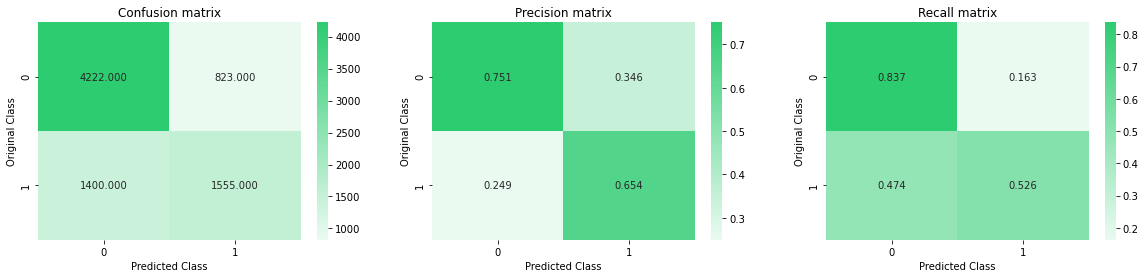

In [52]:
# Predicting the labels not the probabilites
y_predict = calibrated_clf.predict(X_test)
print(f"Accuracy score for Logistic Regression model is {accuracy_score(y_test,y_predict)}")
plot_confusion_matrix(y_test,y_predict)

For all plots we should work to make the **diagonal dark** and **off-diagonal light**

#### Linear SVC

In [53]:
# I will use SGDClassifier with loss:hinge instead of SVC to reduce the time
# start time 
start = time.time()

# Initializing Classifier
svc_clf = SGDClassifier(alpha=.0001, penalty='l1', loss='hinge', random_state=42) # you can try parameter tuning here also
# Fitting the classifier
svc_clf.fit(X_train,y_train)

print ('Model Fitted Successfully')

# Initializing the Calibration
calibrated_svc_clf = CalibratedClassifierCV(svc_clf)
# Fitting the calibration
calibrated_svc_clf.fit(X_train,y_train)

print ('Calibration Done Successfully')

# Chech log loss from Training DataSet
y_predict_train = calibrated_svc_clf.predict_proba(X_train)
log_loss_train = log_loss(y_train, y_predict_train, labels=svc_clf.classes_)
print("Log Loss value for our Linear Support Vector Classifier in Test Data:",log_loss_train)

# Chech log loss from Test DataSet
y_predict_test = calibrated_svc_clf.predict_proba(X_test)
log_loss_test = log_loss(y_test, y_predict_test, labels=svc_clf.classes_)
print("Log Loss value for our Linear Support Vector Classifier in Test Data:",log_loss_test)

#end time
end = time.time()

print(f'\nCell take {end-start} seconds')

Model Fitted Successfully
Calibration Done Successfully
Log Loss value for our Linear Support Vector Classifier in Test Data: 0.49561343460844953
Log Loss value for our Linear Support Vector Classifier in Test Data: 0.5005332011691245
/nCell take 819.6480398178101 seconds


Accuracy score for Logistic Regression model is 0.740125


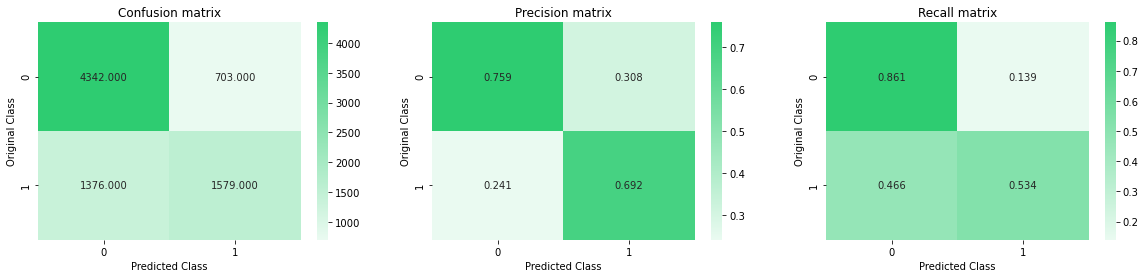

In [54]:
# Predicting the labels not the probabilites
y_predict = calibrated_svc_clf.predict(X_test)
print(f"Accuracy score for Logistic Regression model is {accuracy_score(y_test,y_predict)}")
plot_confusion_matrix(y_test,y_predict)

#### Random Forest Classifier

In [55]:
# start time 
start = time.time()

# Initializing Classifier
rf_clf = RandomForestClassifier() # you can try parameter tuning here also
# Fitting the classifier
rf_clf.fit(X_train,y_train)

# Chech log loss from Training DataSet
y_predict_train = rf_clf.predict_proba(X_train)
log_loss_train = log_loss(y_train, y_predict_train, labels=rf_clf.classes_)
print("Log Loss value for our Random Forest Classifier in Test Data:",log_loss_train)

# Chech log loss from Test DataSet
y_predict_test = rf_clf.predict_proba(X_test)
log_loss_test = log_loss(y_test, y_predict_test, labels=rf_clf.classes_)
print("Log Loss value for our Random Forest Vector Classifier in Test Data:",log_loss_test)

#end time
end = time.time()

print(f'\nCell take {end-start} seconds')

Log Loss value for our Random Forest Classifier in Test Data: 0.11431377163004541
Log Loss value for our Random Forest Vector Classifier in Test Data: 0.40554703910154266
/nCell take 114.30980610847473 seconds


Accuracy score for Logistic Regression model is 0.7945


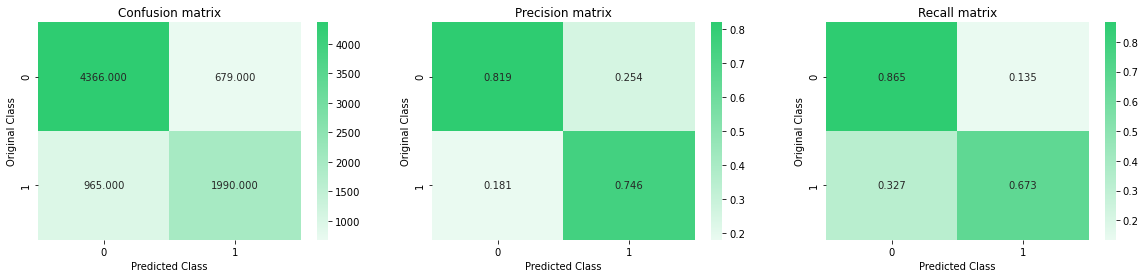

In [56]:
# Predicting the labels not the probabilites
y_predict = rf_clf.predict(X_test)
print(f"Accuracy score for Logistic Regression model is {accuracy_score(y_test,y_predict)}")
plot_confusion_matrix(y_test,y_predict)

#### XGBoost Classifier

In [57]:
# start time 
start = time.time()

xgb.set_config(verbosity=0)

# Initializing the classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic',n_estimators=400,eval_metric='logloss',max_depth=4, eta=0.02,early_stopping_rounds=20)

# training our classifier 
xgb_clf.fit(X_train,y_train,eval_set=[(X_train, y_train),(X_test, y_test)])

# Chech log loss from Training DataSet
y_predict_train = xgb_clf.predict_proba(X_train)
log_loss_train = log_loss(y_train, y_predict_train)
print("Log Loss value for our XGBoost Classifier in Test Data:",log_loss_train)

# Chech log loss from Test DataSet
y_predict_test = xgb_clf.predict_proba(X_test)
log_loss_test = log_loss(y_test, y_predict_test)
print("Log Loss value for our XGBoost Vector Classifier in Test Data:",log_loss_test)

#end time
end = time.time()

print(f'\nCell take {end-start} seconds')

[0]	validation_0-logloss:0.68607	validation_1-logloss:0.68602
[1]	validation_0-logloss:0.67926	validation_1-logloss:0.67916
[2]	validation_0-logloss:0.67272	validation_1-logloss:0.67258
[3]	validation_0-logloss:0.66641	validation_1-logloss:0.66622
[4]	validation_0-logloss:0.66027	validation_1-logloss:0.66003
[5]	validation_0-logloss:0.65441	validation_1-logloss:0.65417
[6]	validation_0-logloss:0.64869	validation_1-logloss:0.64841
[7]	validation_0-logloss:0.64317	validation_1-logloss:0.64289
[8]	validation_0-logloss:0.63786	validation_1-logloss:0.63752
[9]	validation_0-logloss:0.63276	validation_1-logloss:0.63243
[10]	validation_0-logloss:0.62779	validation_1-logloss:0.62745
[11]	validation_0-logloss:0.62299	validation_1-logloss:0.62264
[12]	validation_0-logloss:0.61837	validation_1-logloss:0.61801
[13]	validation_0-logloss:0.61387	validation_1-logloss:0.61352
[14]	validation_0-logloss:0.60951	validation_1-logloss:0.60918
[15]	validation_0-logloss:0.60531	validation_1-logloss:0.60499
[1

[130]	validation_0-logloss:0.44194	validation_1-logloss:0.44514
[131]	validation_0-logloss:0.44155	validation_1-logloss:0.44478
[132]	validation_0-logloss:0.44113	validation_1-logloss:0.44437
[133]	validation_0-logloss:0.44068	validation_1-logloss:0.44396
[134]	validation_0-logloss:0.44030	validation_1-logloss:0.44362
[135]	validation_0-logloss:0.43993	validation_1-logloss:0.44325
[136]	validation_0-logloss:0.43961	validation_1-logloss:0.44298
[137]	validation_0-logloss:0.43925	validation_1-logloss:0.44263
[138]	validation_0-logloss:0.43891	validation_1-logloss:0.44233
[139]	validation_0-logloss:0.43853	validation_1-logloss:0.44200
[140]	validation_0-logloss:0.43815	validation_1-logloss:0.44166
[141]	validation_0-logloss:0.43784	validation_1-logloss:0.44136
[142]	validation_0-logloss:0.43750	validation_1-logloss:0.44106
[143]	validation_0-logloss:0.43720	validation_1-logloss:0.44079
[144]	validation_0-logloss:0.43687	validation_1-logloss:0.44052
[145]	validation_0-logloss:0.43657	valid

[259]	validation_0-logloss:0.41398	validation_1-logloss:0.42159
[260]	validation_0-logloss:0.41384	validation_1-logloss:0.42150
[261]	validation_0-logloss:0.41374	validation_1-logloss:0.42140
[262]	validation_0-logloss:0.41365	validation_1-logloss:0.42135
[263]	validation_0-logloss:0.41349	validation_1-logloss:0.42121
[264]	validation_0-logloss:0.41337	validation_1-logloss:0.42115
[265]	validation_0-logloss:0.41322	validation_1-logloss:0.42108
[266]	validation_0-logloss:0.41313	validation_1-logloss:0.42103
[267]	validation_0-logloss:0.41301	validation_1-logloss:0.42093
[268]	validation_0-logloss:0.41286	validation_1-logloss:0.42083
[269]	validation_0-logloss:0.41268	validation_1-logloss:0.42070
[270]	validation_0-logloss:0.41257	validation_1-logloss:0.42065
[271]	validation_0-logloss:0.41243	validation_1-logloss:0.42052
[272]	validation_0-logloss:0.41233	validation_1-logloss:0.42045
[273]	validation_0-logloss:0.41225	validation_1-logloss:0.42038
[274]	validation_0-logloss:0.41216	valid

[388]	validation_0-logloss:0.40102	validation_1-logloss:0.41338
[389]	validation_0-logloss:0.40094	validation_1-logloss:0.41335
[390]	validation_0-logloss:0.40088	validation_1-logloss:0.41331
[391]	validation_0-logloss:0.40081	validation_1-logloss:0.41327
[392]	validation_0-logloss:0.40075	validation_1-logloss:0.41324
[393]	validation_0-logloss:0.40068	validation_1-logloss:0.41320
[394]	validation_0-logloss:0.40063	validation_1-logloss:0.41316
[395]	validation_0-logloss:0.40054	validation_1-logloss:0.41314
[396]	validation_0-logloss:0.40043	validation_1-logloss:0.41305
[397]	validation_0-logloss:0.40038	validation_1-logloss:0.41303
[398]	validation_0-logloss:0.40032	validation_1-logloss:0.41300
[399]	validation_0-logloss:0.40024	validation_1-logloss:0.41297
Log Loss value for our XGBoost Classifier in Test Data: 0.4002425482649742
Log Loss value for our XGBoost Vector Classifier in Test Data: 0.4129721031244117

Cell take 1645.1760387420654 seconds


Accuracy score for Logistic Regression model is 0.782125


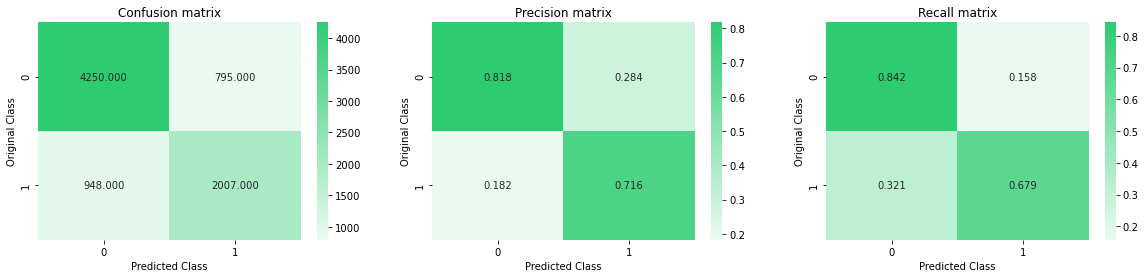

In [58]:
# Predicting the labels not the probabilites
y_predict = xgb_clf.predict(X_test)
print(f"Accuracy score for Logistic Regression model is {accuracy_score(y_test,y_predict)}")
plot_confusion_matrix(y_test,y_predict)

## Summary

We have reached **80% accuracy** and **log-loss=0.40** which is great, but why?
* We are working with only **10% of our data to train the models: 40,000/400,000**
* We didn't go with **hyberparameter tuning** a lot and do GridSearchCV which will help a lot for improving our model
* We Used TfidfVectorizer with **max_features=3000 that we can increase** 
* We can **do more feature engineering work**

## Conclusion

This Case Study was amazing because we take a look of **NLP project** which include:
- Cleaning Text throught:
    * Removing HTML tags if found
    * Removing punctuations
    * Performing Stemming
    * Removing stop words
    * Expanding contractions
- Creating More Features with Three Stages:
    * Basic Feature Extraction
    * Advanced Feature Extraction
    * Text Featurizing with TFIDF Vectorizer
- Building Classification Models with 4 different classifiers:
    * Logistic Regression
    * Linear SVC (I do it with SGD with loss=hinge to take the benefits of SGD) 
    * Random Forest Classifier
    * XGBoost Classifier
- Using Different Evaluation Metrics:
    * Log-Loss
    * Accuracy
    * Confusion matrix
    * Plotting confusion matrix, precision and recall


## Thanks for Reading
- You can **clone this project** and get hands on with the data
- take a look at the main page of this problem in **kaggle** and **read the discussion**
- link: https://www.kaggle.com/c/quora-question-pairs